In [1]:
import cv2
import tensorflow as tf
import sys

sys.path.append("../src")
from tensorflow_wavelets.utils.models import *
from tensorflow_wavelets.utils.mse import *
from tensorflow_wavelets.utils.data import *

from matplotlib import pyplot as plt
import numpy as np


In [2]:
num_samples = 1024
x = np.linspace(0, 2 * np.pi, num_samples)
signal = np.sin(5 * x).astype(np.float32)  # 5 Hz sine wave

# Expand dimensions to match model input requirements
signal_ex1 = np.expand_dims(signal, axis=-1)  # Add channel dimension
signal_ex2 = np.expand_dims(signal_ex1, axis=0)  # Add batch dimension

print(signal.shape)
print(signal_ex1.shape)
print(signal_ex2.shape)

(1024,)
(1024, 1)
(1, 1024, 1)


In [4]:
dwt = DWT.DWT1D(wavelet_name="haar")(tf.dtypes.cast(signal_ex2, tf.float32))
print(dwt.shape)
idwt = DWT.IDWT1D(wavelet_name="haar")(tf.dtypes.cast(dwt, tf.float32))
print(idwt.shape)

(1, 512, 2)
(1, 1024, 1)


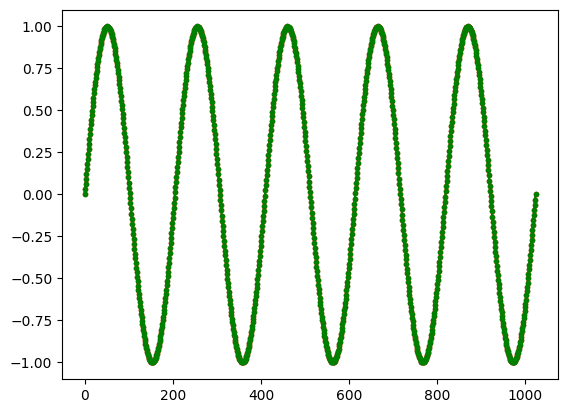

In [21]:
plt.plot(idwt[0, :], **{'color': 'r', 'marker': '.'})
plt.plot(signal, **{'color': 'g', 'marker': '.'})


In [ ]:
reconstructed = idwt[0,: ,:].numpy().flatten()
print(np.array_equal(reconstructed, signal))
print(np.allclose(reconstructed, signal, atol=1e-05))
print(abs(reconstructed - signal).max())


False
True
1.1920929e-07
[0.         0.03070478 0.0613806  0.09199854 0.12252972 0.15294537
 0.18321678 0.21331543 0.24321291 0.27288103]
[0.         0.03070478 0.0613806  0.09199855 0.12252973 0.15294537
 0.18321678 0.21331543 0.24321291 0.27288103]
